## Changing current working directory

In [ ]:
import os
os.chdir(r'C:\Users\praka\OneDrive\Desktop\METRO\PYTHON_PROJECT\KRUTIKA_PROJECT')
os.getcwd()

## Import the libraries

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 

## Import the dataset

In [4]:
df= pd.read_csv('cinematicket.csv')


In [5]:
#checking  number of obs and columns ,index of columns, name of columns, number of non_null values and datatype, (memory usage,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


## Check the missing values

In [6]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [7]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [8]:
percentage_of_miss()

,Number of Missing,Percentage
occu_perc,125,0.087705
capacity,125,0.087705


In [9]:
df.fillna(
            {
                'occu_perc': df.occu_perc.mean(),
                'capacity': df.capacity.mean()
            }, 
            inplace = True
            )
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


## CATEGORICAL COLUMNS 

In [10]:
df_cat = df.select_dtypes(include="object")
df_cat.columns

Index(['date'], dtype='object')

## NUMERICAL COLUMNS

In [11]:
df_cat = df.select_dtypes(exclude="object")
df_cat.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'month', 'quarter', 'day'],
      dtype='object')

# UNIVARIATE ANALYSIS

#### DPENDENT VARIABLE

{'whiskers': [<matplotlib.lines.Line2D at 0x2660edfd760>,
 'caps': [<matplotlib.lines.Line2D at 0x2660edfde20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2660edfd400>],
 'medians': [<matplotlib.lines.Line2D at 0x2660ee12520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2660ee12880>],
 'means': []}

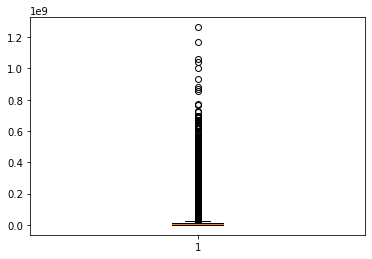

In [12]:
df1 = df
df1['total_sales']
box_plot_data=df1['total_sales']
plt.boxplot(box_plot_data)


In [13]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    df_out =df[(df1[col]<LIF) | (df1[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1.603500e+04
mean     6.775103e+07
std      6.800393e+07
min      2.587000e+07
25%      3.300000e+07
50%      4.572000e+07
75%      7.485000e+07
max      1.262820e+09
Name: total_sales, dtype: float64

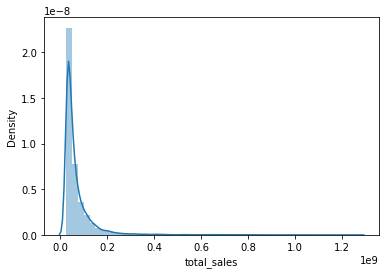

In [14]:
outlier_analysis('total_sales')

In [15]:
df1['total_sales'].describe()

count    1.425240e+05
mean     1.234728e+07
std      3.065486e+07
min      2.000000e+04
25%      1.260000e+06
50%      3.720000e+06
75%      1.110000e+07
max      1.262820e+09
Name: total_sales, dtype: float64

In [16]:
# CONCLUSION : Total_sales i.e. the dependent variable is positively skewed (right-skewed).

#### INDEPENDENT VARIABLES

{'whiskers': [<matplotlib.lines.Line2D at 0x26611ec3760>,
 'caps': [<matplotlib.lines.Line2D at 0x26611ec3e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x26611ec3400>],
 'medians': [<matplotlib.lines.Line2D at 0x26611ed0520>],
 'fliers': [<matplotlib.lines.Line2D at 0x26611ed0880>],
 'means': []}

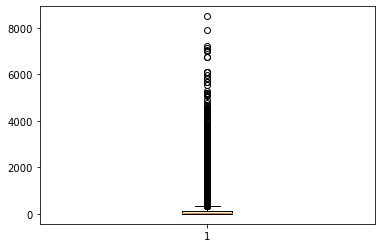

In [17]:
df1 = df
df1['tickets_sold']
box_plot_data=df1['tickets_sold']
plt.boxplot(box_plot_data)


In [18]:
#OUTLIER ANALYSIS

In [19]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    df_out =df[(df1[col]<LIF) | (df1[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    15011.000000
mean       728.056892
std        555.807996
min        331.000000
25%        411.000000
50%        544.000000
75%        813.000000
max       8499.000000
Name: tickets_sold, dtype: float64

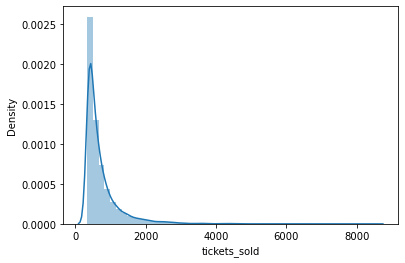

In [20]:
outlier_analysis('tickets_sold')

In [21]:
#CONCLUSION : Tickets sold has right skewed distribution 

#### SHOWTIME

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1, 'Bar chart for  show_time')

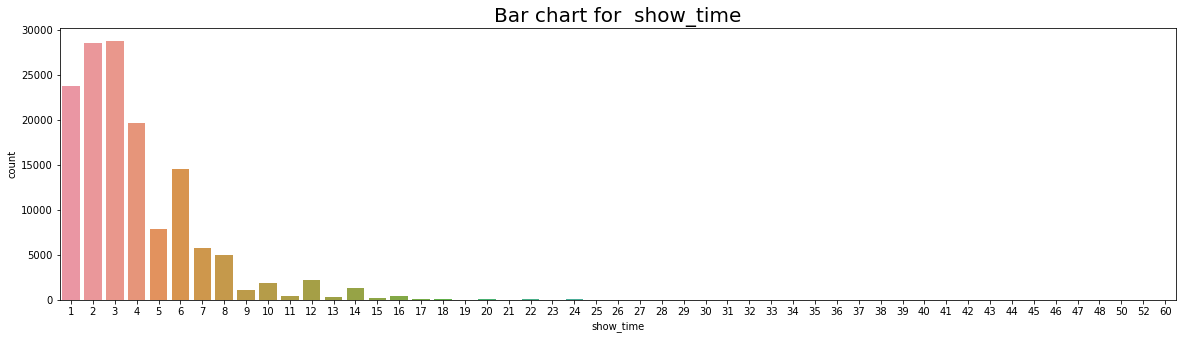

In [22]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(df1['show_time'])
plt.title("Bar chart for  show_time", y=1, fontdict={"fontsize": 20})

In [23]:
#CONCLUSION: showtime for 1,2,3,4 & 6 has the highest frequency.

#### TICKETS_SOLD

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tickets_sold', ylabel='Density'>

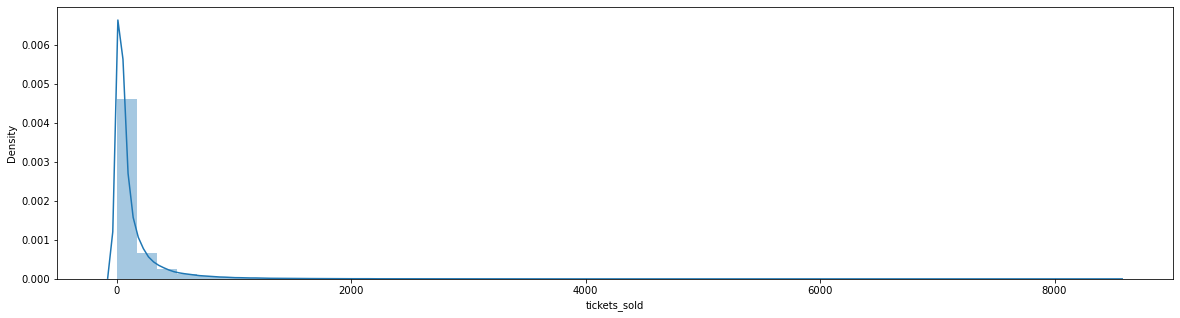

In [24]:
 sns.distplot(df1['tickets_sold'])

In [25]:
#CONCLUSION : The data is mostly clustered between the range 0 to 1000 and the graph is postively skewed (right-skewed)

#### TICKETS_OUT

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tickets_out', ylabel='Density'>

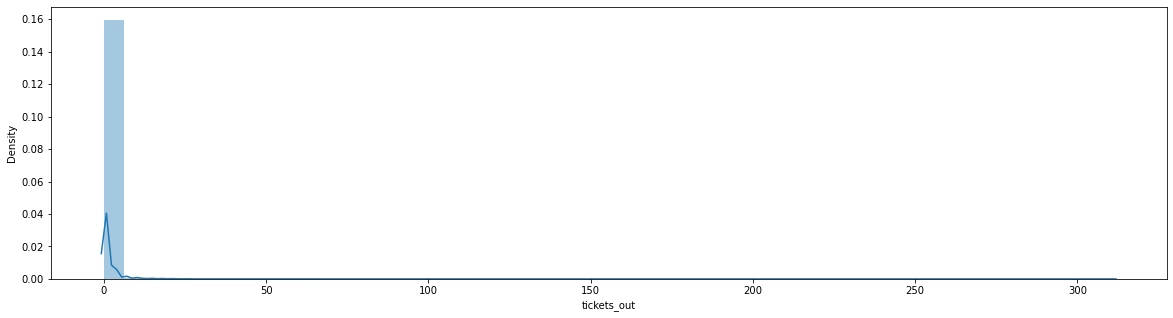

In [26]:
 sns.distplot(df1['tickets_out'])

In [27]:
#CONCLUSION : The graph shows all the data clustered at 0 and the distribution is between 0 to 10 because it is 
# tickets getting cancelled , so usually it is 0. But according to this graph there are cases tickets ranging upto 300  
#getting cancelled.


#### occupation percent of cinema by means of available capacity

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='occu_perc', ylabel='Density'>

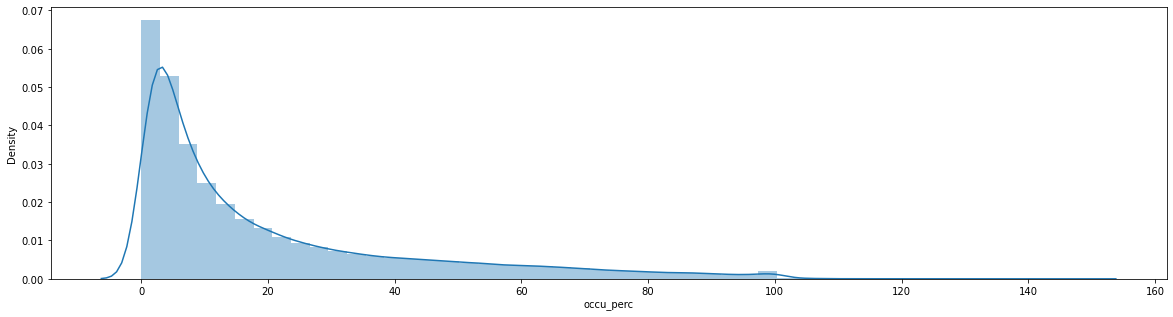

In [28]:
 sns.distplot(df1['occu_perc'])

In [29]:
#CONCLUSION : occupation percent of cinema by means of available capacity it ranges between 0 to 100 depending on the 
#cinema hall capacity and the graph is right skewed.


In [30]:
#TICKETS PRICE

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ticket_price', ylabel='Density'>

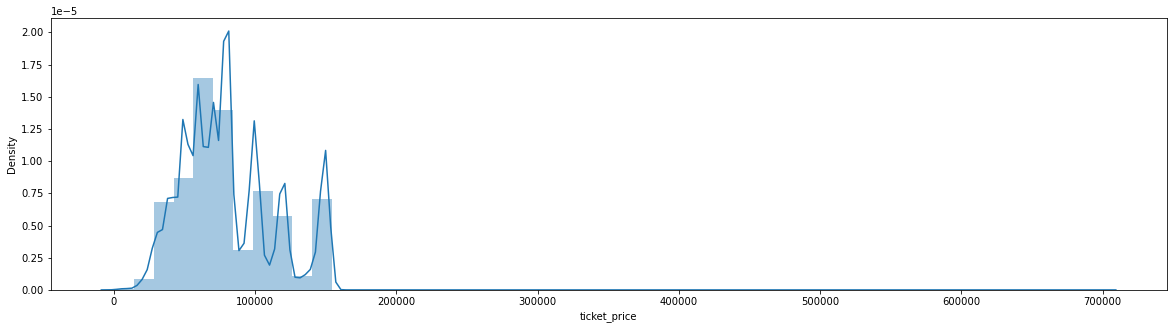

In [31]:
 sns.distplot(df1['ticket_price'])

In [32]:
#CONCLUSION : The data follows normal distribution and most of the data falls in the range of 0 to 1500

#### TICKET_USE

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ticket_use', ylabel='Density'>

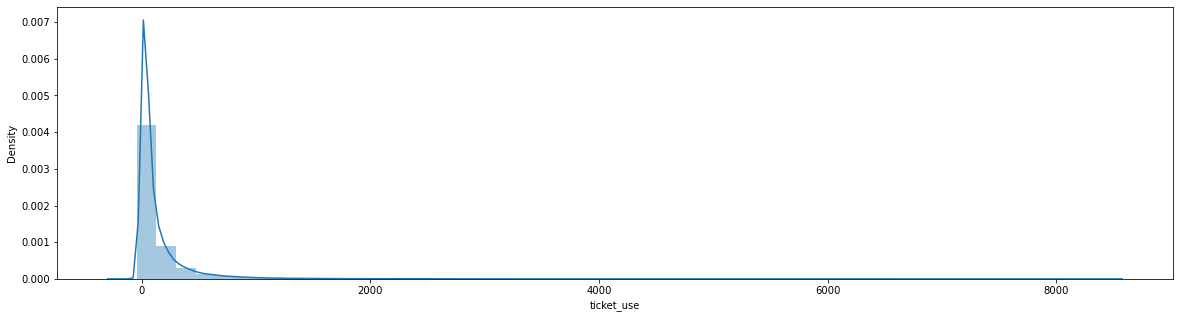

In [33]:

sns.distplot(df1['ticket_use'])


In [34]:
#CONCLUSION : tickets use is same as the tickets sold out until there is any cancellation or no show the data is right skewed.

#### CAPACITY

C:\Users\praka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capacity', ylabel='Density'>

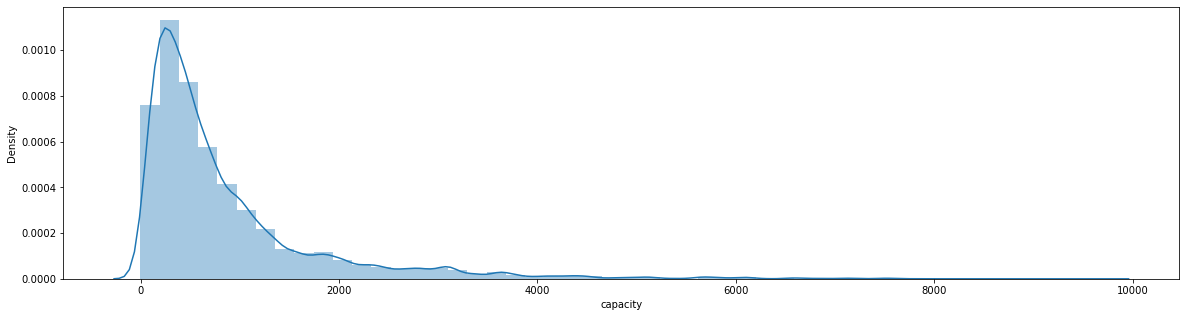

In [35]:
sns.distplot(df1['capacity'])

In [36]:
#CONCLUSION : Capacity  of the  which ranges from  0 to 10000. it is right skewed

#### MONTH

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1, 'Bar chart for  month')

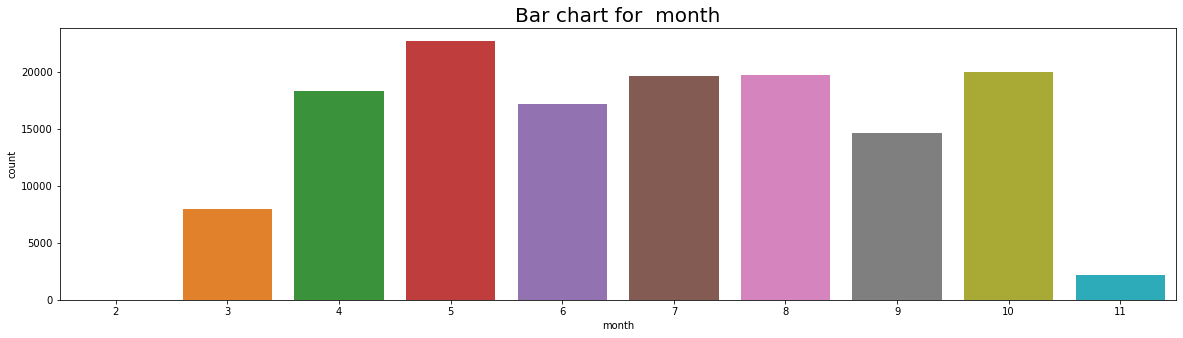

In [37]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(df1['month'])
plt.title("Bar chart for  month", y=1, fontdict={"fontsize": 20})

In [38]:
#CONCLUSION : May month has the highest frequency of cinemas, while November being the lowest. While Janauary and February 
# has no cinema shows.

#### QUARTER

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1, 'Bar chart for  quarter')

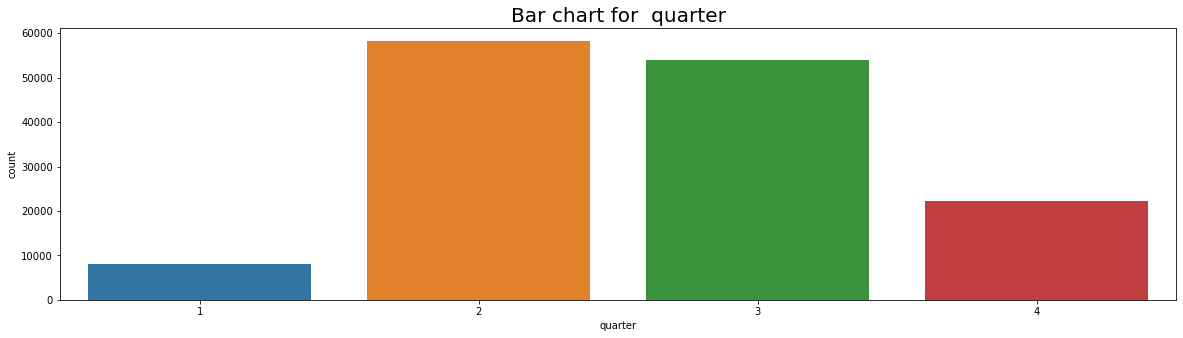

In [39]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(df1['quarter'])
plt.title("Bar chart for  quarter", y=1, fontdict={"fontsize": 20})

In [40]:
#CONCLUSION : Quarter 2 and Quarter 3 has the highest frequency for cinema shows.

#### DAY

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1, 'Bar chart for  day')

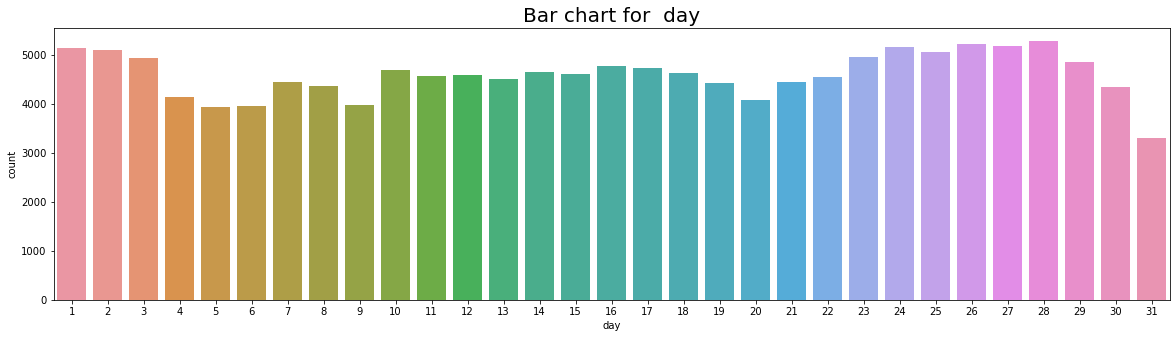

In [41]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(df1['day'])
plt.title("Bar chart for  day", y=1, fontdict={"fontsize": 20})

In [42]:
#CONCLUSION : The data is evenly distributed.

# BIVARIATE ANALYSIS

In [43]:
df1.corr()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.000000,0.029530,0.009802,-0.005588,-0.000920,0.076670,-0.104074,0.104820,-0.005582,0.061196,0.851380,0.800933,-0.028686
cinema_code,0.029530,1.000000,-0.012910,-0.053716,0.019534,-0.187125,0.125448,0.005079,-0.053957,-0.353136,0.051027,0.049646,-0.000270
total_sales,0.009802,-0.012910,1.000000,0.915176,0.066810,0.509812,0.413964,0.272450,0.915112,0.375722,-0.080568,-0.051433,-0.000424
tickets_sold,-0.005588,-0.053716,0.915176,1.000000,0.071498,0.522088,0.493403,0.103596,0.999946,0.425206,-0.103477,-0.062666,-0.005037
tickets_out,-0.000920,0.019534,0.066810,0.071498,1.000000,0.078860,0.044403,0.011916,0.061091,0.037596,-0.012448,-0.007210,0.004441
show_time,0.076670,-0.187125,0.509812,0.522088,0.078860,1.000000,0.055603,0.176274,0.521625,0.681474,-0.023297,-0.020643,0.007646
occu_perc,-0.104074,0.125448,0.413964,0.493403,0.044403,0.055603,1.000000,0.084631,0.493281,-0.141262,-0.144984,-0.088786,-0.011056
ticket_price,0.104820,0.005079,0.272450,0.103596,0.011916,0.176274,0.084631,1.000000,0.103544,0.004285,0.048007,0.042031,0.001113
ticket_use,-0.005582,-0.053957,0.915112,0.999946,0.061091,0.521625,0.493281,0.103544,1.000000,0.425108,-0.103418,-0.062634,-0.005087
capacity,0.061196,-0.353136,0.375722,0.425206,0.037596,0.681474,-0.141262,0.004285,0.425108,1.000000,-0.025245,-0.023921,0.006252


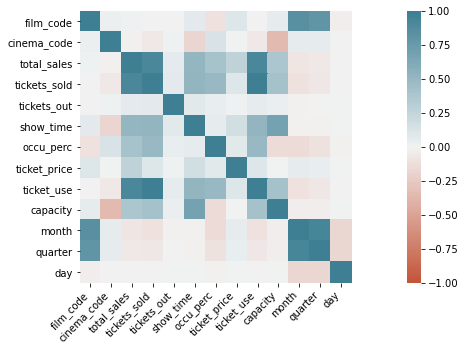

In [44]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

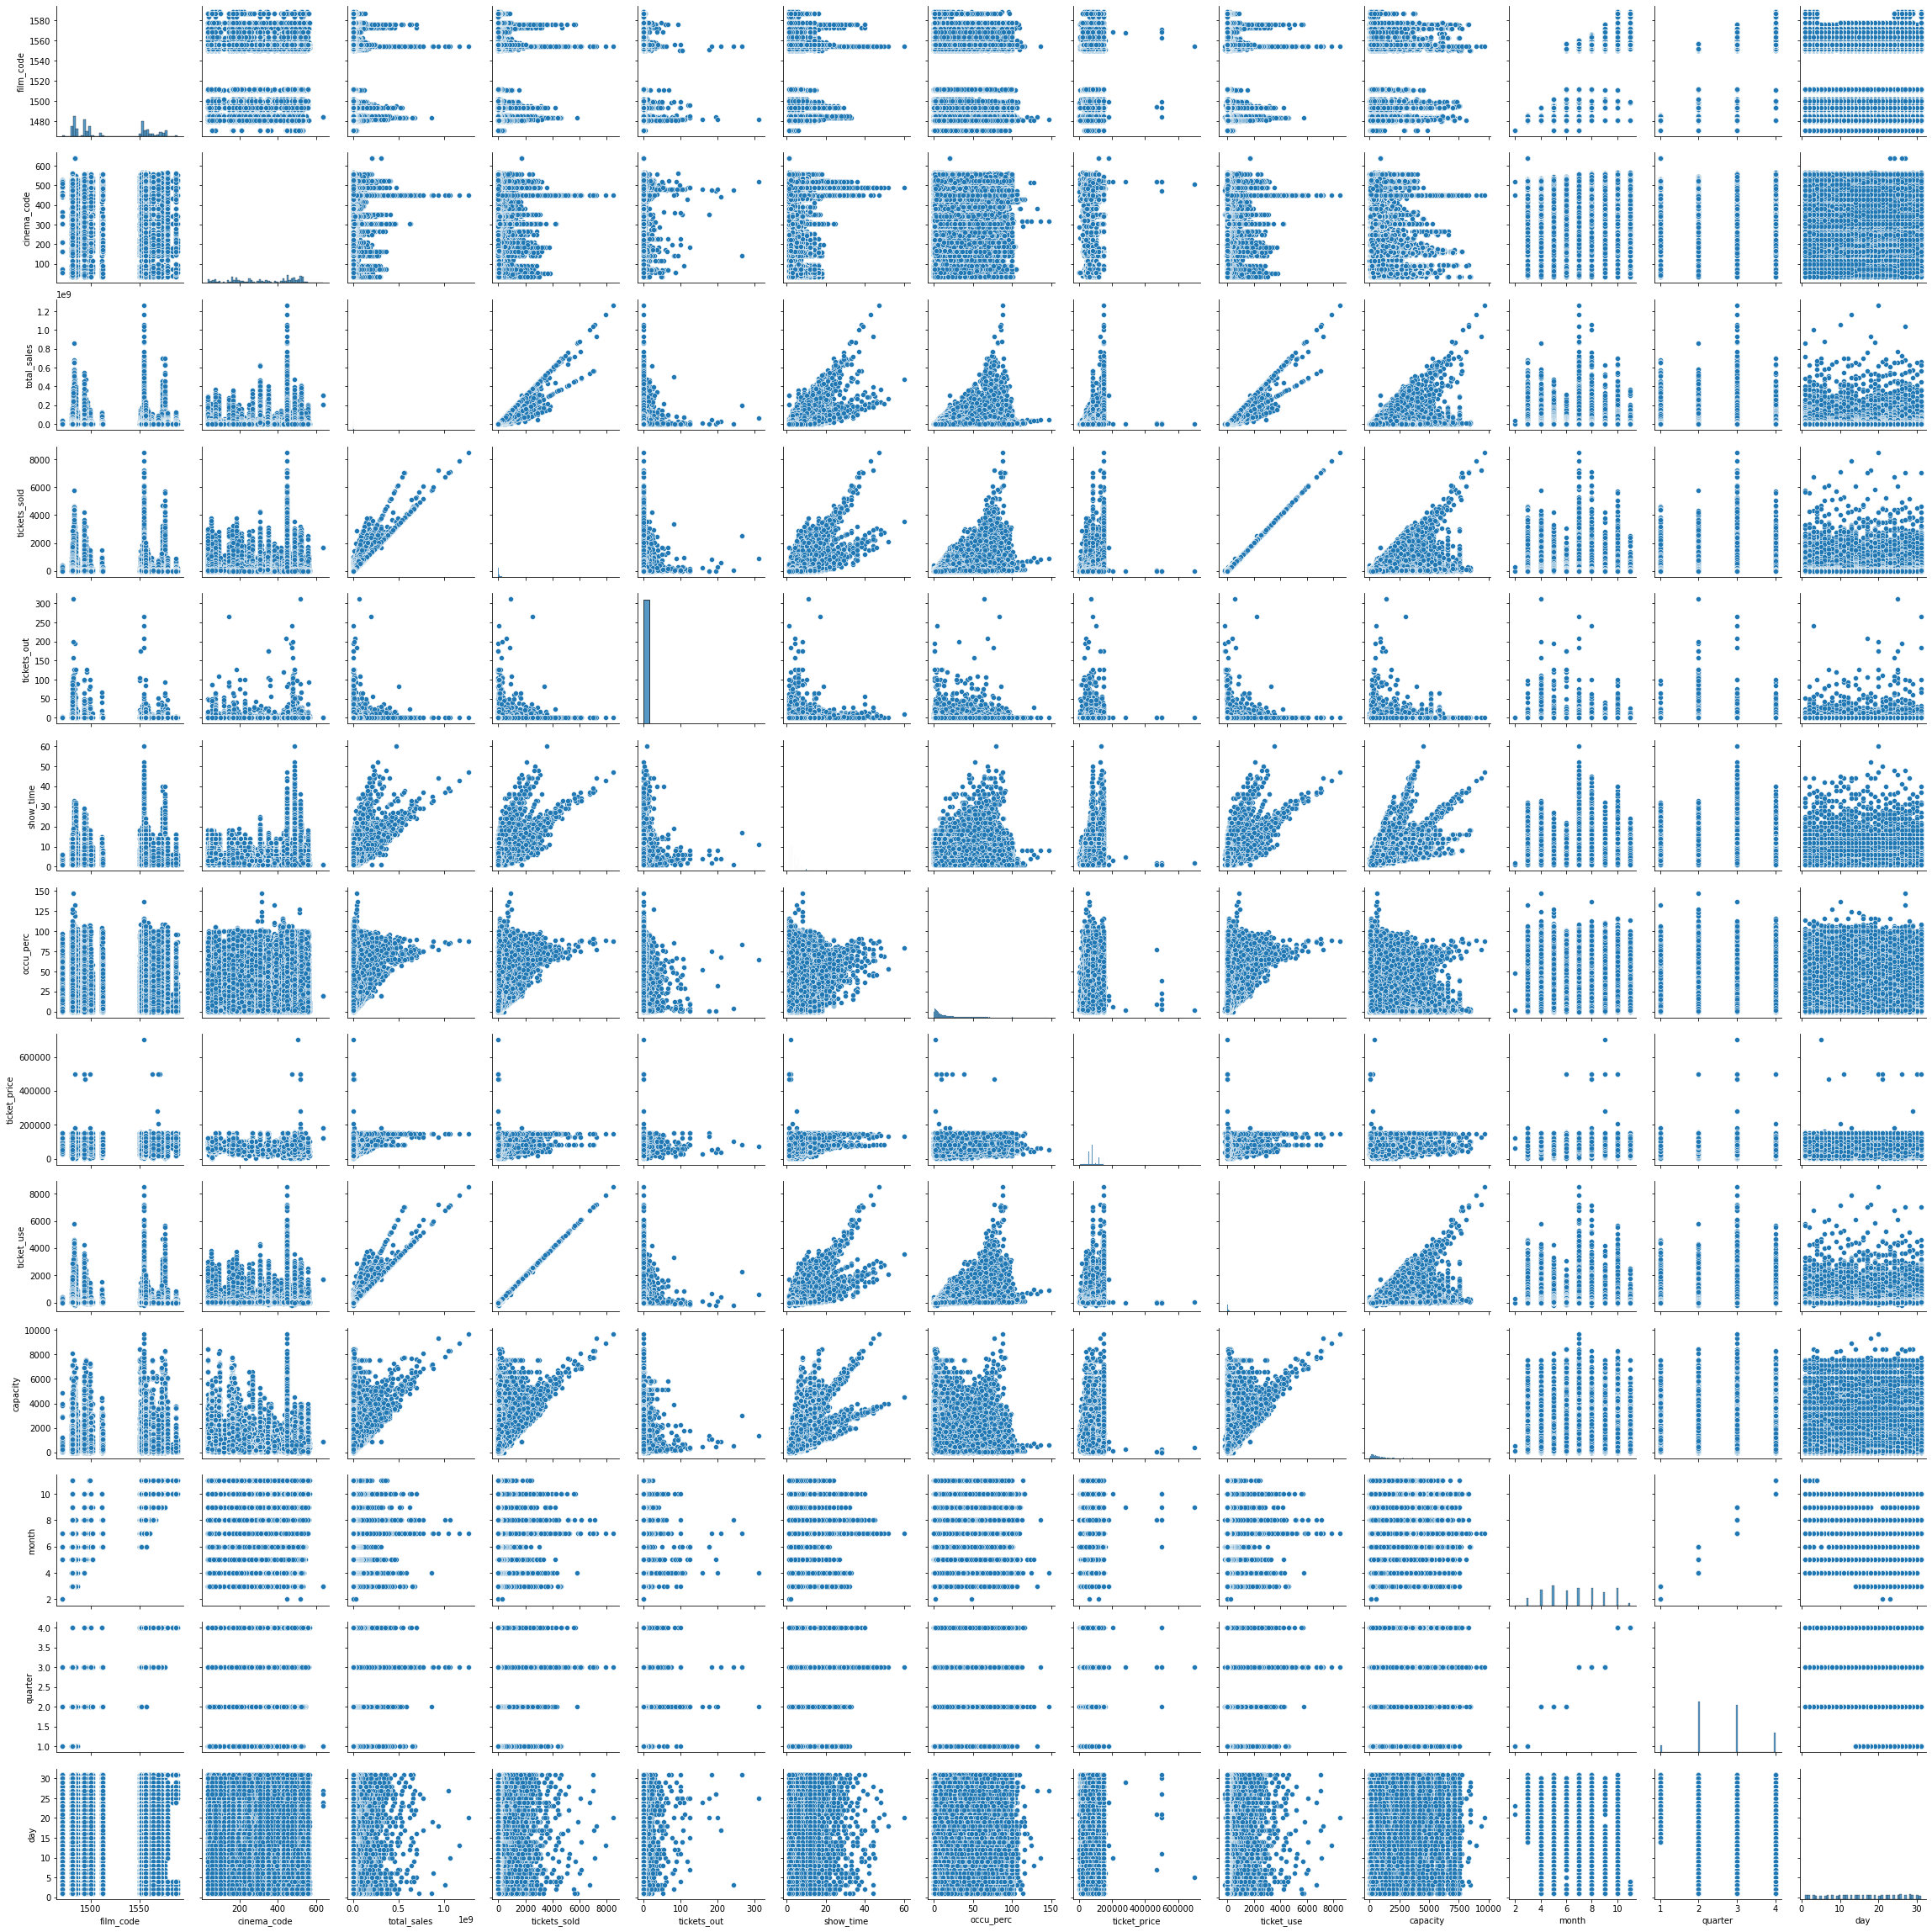

In [45]:
sns.pairplot(df)

In [46]:
#CONCLUSION :

<AxesSubplot:xlabel='film_code'>

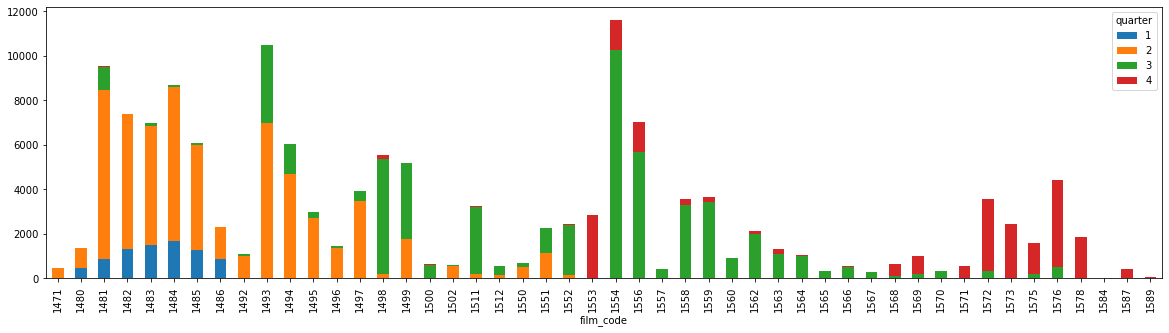

In [47]:
pd.crosstab(df['film_code'], df['quarter']).plot(kind='bar', stacked=True)


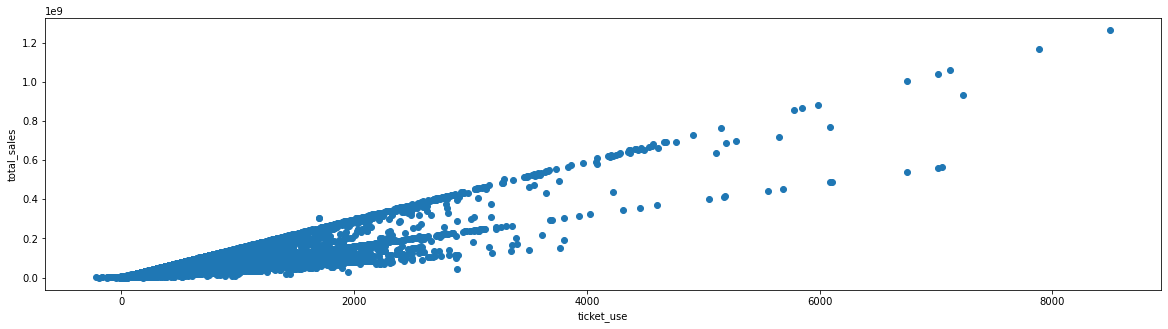

<Figure size 400x400 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df['ticket_use'], df['total_sales'])
plt.xlabel("ticket_use")
plt.ylabel("total_sales")
plt.figure(figsize=(5,5), dpi=80)
plt.show()

In [49]:
#CONCLUSION : There is a positive correlation between tickets used and total sales.

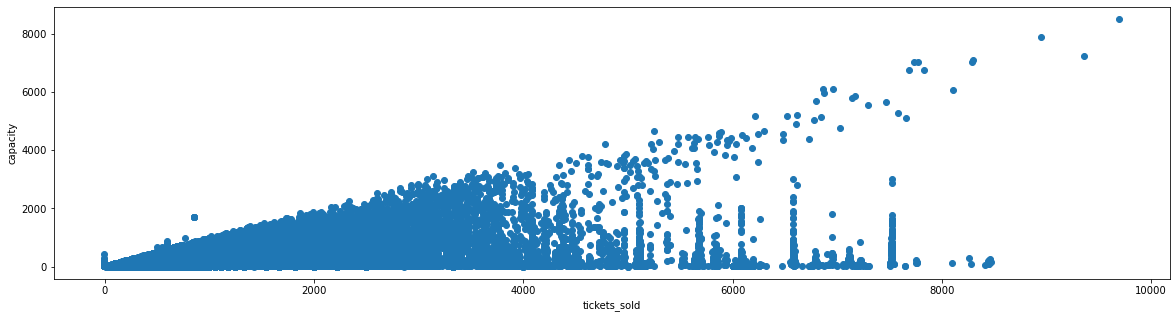

In [50]:

plt.scatter(df['capacity'], df['tickets_sold'])
plt.xlabel("tickets_sold")
plt.ylabel("capacity")
plt.show()

In [51]:
#CONCLUSION : there is a positive correlation between capacity and tickets sold.

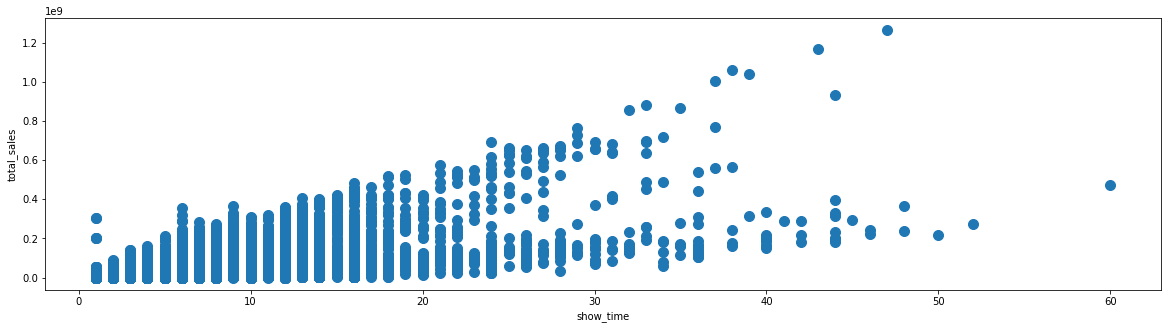

In [52]:
df.plot.scatter(x = 'show_time', y = 'total_sales', s = 100);


In [53]:
#CONCLUSION : there is a positive correlation between show_time and total_sales

In [ ]:
#pd.crosstab(df['month'], df['total_sales']).plot(kind='bar')
sns.swarmplot(x="month", y="total_sales", data=df)
